In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score


In [79]:
dataset = pd.read_csv('creditcard.csv')

In [80]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
# drop the Time column 

dataset=dataset.drop(['Time'],axis=1)

In [82]:
# apply the feature scalling on Amount to get more correct result
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

dataset['Amount'] = sc.fit_transform(pd.DataFrame(dataset['Amount']))

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [84]:
dataset['Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

<Axes: xlabel='Class', ylabel='count'>

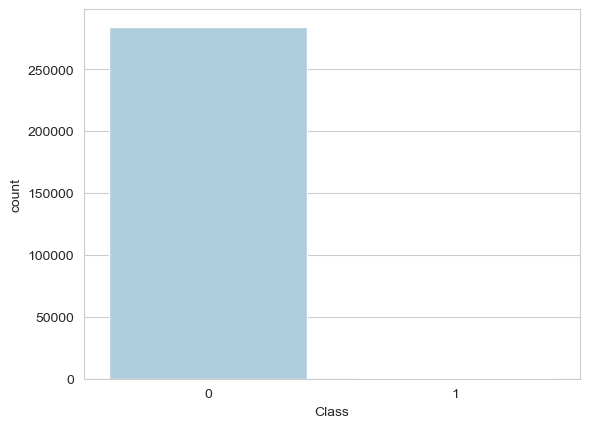

In [85]:
# checking for balance dataset
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='Class',data=dataset,palette='RdBu_r')

In [86]:
normal = dataset[dataset['Class']==0]
fraud = dataset[dataset['Class']==1]

In [87]:
fraud.shape

(492, 30)

In [88]:
normal.shape

(284315, 30)

In [89]:
# Handling the unbalanced dataset

normal_balanced = normal.sample(n=492)
normal_balanced.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38388,-0.973943,1.171064,0.907219,1.350711,0.251160,-0.015635,0.608004,0.431914,-1.702975,-0.207562,...,0.240438,0.488302,-0.226887,0.048213,0.498952,-0.001601,-0.045287,-0.027964,-0.130816,0
121395,0.568743,-1.264637,-0.192606,0.584874,-0.027612,1.660213,-0.120326,0.388926,-1.390879,0.632941,...,-0.046255,-0.011021,-0.209170,-1.016625,0.297198,-0.180020,0.052290,0.044552,0.806216,0
225134,2.121845,-0.077684,-1.501458,0.175022,0.384167,-0.608838,0.193789,-0.288500,0.563432,0.062063,...,-0.349568,-0.868084,0.201537,-0.994533,-0.151468,0.258554,-0.071361,-0.068538,-0.317287,0
249752,2.017549,0.018322,-1.630912,0.358423,0.266270,-0.694315,-0.000943,-0.027973,0.417480,-0.171660,...,-0.315359,-0.903835,0.365869,0.634362,-0.357106,0.146891,-0.074774,-0.041472,-0.345313,0
218601,1.921904,0.086733,-1.858047,0.563858,0.291535,-1.399863,0.467222,-0.482375,0.387891,-0.587781,...,0.241205,0.767458,-0.122773,-0.142858,0.290060,-0.106752,-0.006928,-0.014340,-0.037381,0


In [90]:
new_dataset = pd.concat([normal_balanced,fraud])

In [91]:
new_dataset.shape

(984, 30)

In [92]:
# divide the new balanced data set into the features and dependent variable

X_bal = new_dataset.iloc[:, :-1].values
y_bal = new_dataset.iloc[:, -1].values 

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.25, random_state = 0)

In [94]:
#logistic regreassion
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [95]:
# Making the Confusion Matrix
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[116   3]
 [ 12 115]]


0.9390243902439024

In [96]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [97]:
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[109  10]
 [ 16 111]]


0.8943089430894309

In [100]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [101]:
# Making the Confusion Matrix
y_pred3 = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[116   3]
 [ 13 114]]


0.9349593495934959

In [102]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train,y_train)

SVC()

In [103]:
y_pred4 = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[117   2]
 [ 17 110]]


0.9227642276422764

In [116]:

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [117]:
y_pred5 = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[117   2]
 [ 18 109]]


0.9186991869918699

In [121]:
accuracy_data = pd.DataFrame({'Models' : ['logistic regreassion','Random Forest Classification','decision tree','SVC','KNN'],
                             "accuracy score":[accuracy_score(y_test, y_pred1)*100,
                                              accuracy_score(y_test, y_pred2)*100,
                                              accuracy_score(y_test, y_pred3)*100,
                                               accuracy_score(y_test, y_pred4)*100,
                                               accuracy_score(y_test, y_pred5)*100]})

In [122]:
accuracy_data

,Models,accuracy score
0,logistic regreassion,93.902439
1,Random Forest Classification,89.430894
2,decision tree,93.495935
3,SVC,92.276423
4,KNN,91.869919


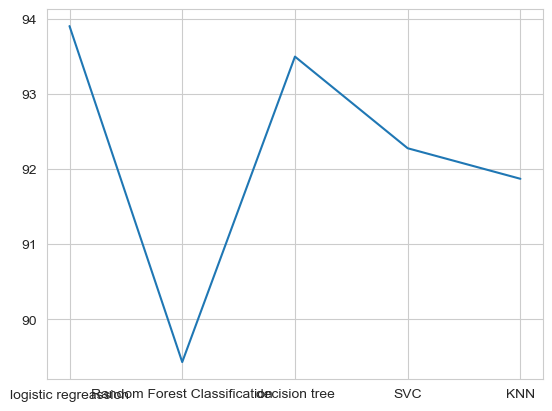

In [123]:
plt.plot(accuracy_data['Models'],accuracy_data['accuracy score'])